# Advertisement Analysis 
This project  analyzes advertisement data obtained from an analytics website, emphasizing key parameters such as Day of the Week, Total Cost,  Rating, Predicted Click-Through Rate, Date, Average Click-Through Rate for each day. Additionally, the analysis includes insights into Cost on Rating and the distribution of advertisement types. Python visualization tools were employed to facilitate a comprehensive examination of the data.

In [1]:
# Import the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import csv
from statistics import mean

In [2]:
class AdAnalytic:
    def __init__(self, date, tag, sub_type, type, rating, cost, predicted_ctr):
        self.date = date
        self.tag = tag
        self.sub_type = sub_type
        self.type = type
        self.rating = rating
        self.cost = cost
        self.predicted_ctr = predicted_ctr
        self.unique_id = id(self)
        
    def __str__(self):
        return str(self.unique_id)+','+self.date+','+self.tag+','+self.sub_type+','+self.type+','+str(self.rating)+','+str(self.cost)+','+str(self.predicted_ctr)

class NativeAdAnalytic(AdAnalytic):
    def __init__(self, date, tag, sub_type, rating, cost, predicted_ctr):
        type = 'Native'
        super().__init__(date, tag, sub_type, type, rating, cost, predicted_ctr)
        
class NonNativeAdAnalytic(AdAnalytic):
    def __init__(self, date, tag, sub_type, rating, cost, predicted_ctr):
        type = 'non-Native'
        super().__init__(date, tag, sub_type, type, rating, cost, predicted_ctr)
        
class InApp(NativeAdAnalytic):
    def __init__(self, date, tag, rating, cost, predicted_ctr):
        sub_type = 'InApp'
        super().__init__(date, tag, sub_type, rating, cost, predicted_ctr)

class Banner(NonNativeAdAnalytic):
    def __init__(self, date, tag, rating, cost, predicted_ctr):
        sub_type = 'Banner'
        super().__init__(date, tag, sub_type, rating, cost, predicted_ctr)
        
class Interstitial(NonNativeAdAnalytic):
    def __init__(date, tag, rating, cost, predicted_ctr):
        sub_type = 'Interstitial'
        super().__init__(self, date, tag, sub_type, rating, cost, predicted_ctr)

In [3]:
# Testing the code with an example
BannerAdAnalytic = Banner("2022-11-15","tagA",2,641,86.06)
print(str(BannerAdAnalytic))

2200668946832,2022-11-15,tagA,Banner,non-Native,2,641,86.06


In [4]:
# Load pickle file
file = open('AdAnalyticpkl310.dat','rb')
objects = pickle.load(file)
file.close()

# Write pickle file data to a CSV file
header = 'unique_id,date,tag,sub_type,type,rating,cost,predicted_ctr'
with open('data.csv','w') as f:
    #write = csv.writer(f) 
    f.write(header+'\n')
    for obj in objects:
        f.write(str(obj)+'\n')

In [5]:
# Read data extracted from the pickle file
df = pd.read_csv('data.csv')
df.head()

unique_id        date           tag sub_type        type rating  \
0  134289279571264  2022-04-07  Interstitial    Gamse  non-Native  PG-13   
1  134289279573616  2022-04-18         InApp    Gamse      Native  PG-13   
2  134289279568336  2022-04-10        Banner    Gamse  non-Native  PG-17   
3  134289279567232  2022-04-04  Interstitial   Health  non-Native  PG-17   
4  134289279567136  2022-07-31         InApp   Health      Native  PG-13   

    cost  predicted_ctr  
0  203.0          18.43  
1  138.0          10.35  
2  235.0          22.60  
3  192.0            NaN  
4  182.0          12.60

In [6]:
# Shape of dataframe
df.shape

(10000, 8)

In [7]:
# Check for missing values
df.isna().sum()

unique_id          0
date             475
tag                0
sub_type           0
type               0
rating           454
cost             412
predicted_ctr    421
dtype: int64

In [8]:
# Check type of columns
df.dtypes

unique_id          int64
date              object
tag               object
sub_type          object
type              object
rating            object
cost             float64
predicted_ctr    float64
dtype: object

In [9]:
# Impute NA values
df['date'].fillna(df['date'].mode()[0], inplace=True) # updated the missing date value with mode value
df['rating'].fillna(df['rating'].mode()[0], inplace=True) # updated the missing rating value with mode value
df['cost'].fillna(df['cost'].mean(), inplace=True) # updated the missing cost value with mean value
df['predicted_ctr'].fillna(df['predicted_ctr'].mean(), inplace=True) # updated the pridicted_ctr date value with mean value

In [10]:
# Check if missing values were successfully imputed
df.isna().sum()

unique_id        0
date             0
tag              0
sub_type         0
type             0
rating           0
cost             0
predicted_ctr    0
dtype: int64

In [11]:
# Create dayOfWeek and month columns to be used in further analysis
df['date'] = pd.to_datetime(df['date'])
df['dayOfWeek'] = df['date'].dt.day_name() 
df['month'] = df['date'].dt.strftime('%m/%Y')

In [12]:
# Check if the new columns have been created
df.head()

unique_id       date           tag sub_type        type rating  \
0  134289279571264 2022-04-07  Interstitial    Gamse  non-Native  PG-13   
1  134289279573616 2022-04-18         InApp    Gamse      Native  PG-13   
2  134289279568336 2022-04-10        Banner    Gamse  non-Native  PG-17   
3  134289279567232 2022-04-04  Interstitial   Health  non-Native  PG-17   
4  134289279567136 2022-07-31         InApp   Health      Native  PG-13   

    cost  predicted_ctr dayOfWeek    month  
0  203.0      18.430000  Thursday  04/2022  
1  138.0      10.350000    Monday  04/2022  
2  235.0      22.600000    Sunday  04/2022  
3  192.0      15.078239    Monday  04/2022  
4  182.0      12.600000    Sunday  07/2022

In [13]:
# Write the processed data to a file
df.to_csv('cleaned_data.csv',index=False)

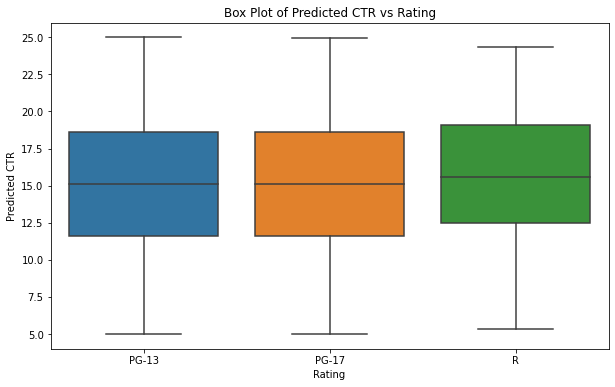

In [14]:
# Box Plot - Predicted CTR vs Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='predicted_ctr', data=df)
plt.title('Box Plot of Predicted CTR vs Rating')
plt.xlabel('Rating')
plt.ylabel('Predicted CTR')
plt.show()

Based on the depicted graph, our conclusion is the first quartile (Q1), median, and third quartile (Q3) values for R-rated ads are elevated, indicating a higher predicted Click-Through Rate (CTR) compared to other categories.

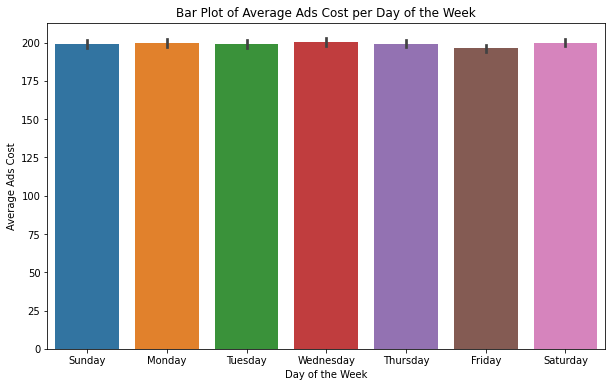

In [15]:
# Bar Plot 1 - Bar Plot of Average Ads Cost per Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x='dayOfWeek', y='cost', data=df, order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('Bar Plot of Average Ads Cost per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ads Cost')
plt.show()

The average cost of ads is approximately consistent across all days of the week, as by the graph above.

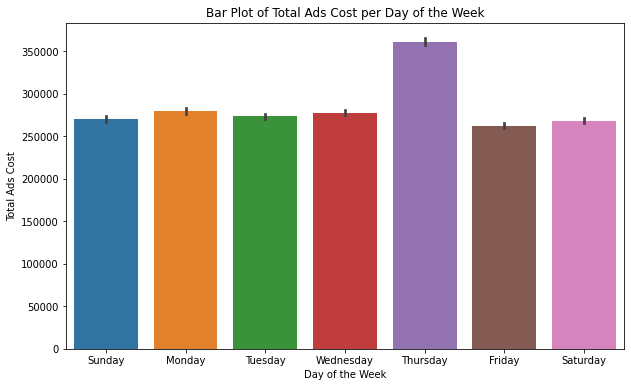

In [16]:
# Bar Plot 2 - Bar Plot of Total Ads Cost per Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x='dayOfWeek', y='cost', data=df, estimator='sum', order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('Bar Plot of Total Ads Cost per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Ads Cost')
plt.show()

Based on the presented graph, Thursdays have the highest total ad cost, suggesting a greater volume of ads being displayed on that day.

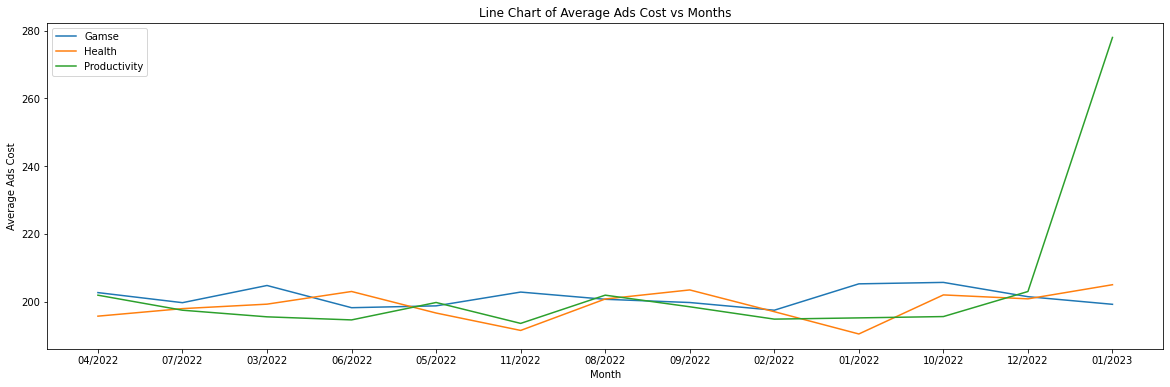

In [17]:
# Line Chart 1 - Line Chart of Average Ads Cost vs Months for different Sub Types
plt.figure(figsize=(20, 6))
sns.lineplot(x='month', y='cost', hue='sub_type', estimator='mean', errorbar=None, data=df)
plt.title('Line Chart of Average Ads Cost vs Months')
plt.xlabel('Month')
plt.ylabel('Average Ads Cost')
plt.legend(loc='upper left')
plt.show()

The graph shows a sudden uptick in the cost of productivity ads towards the end of the year.

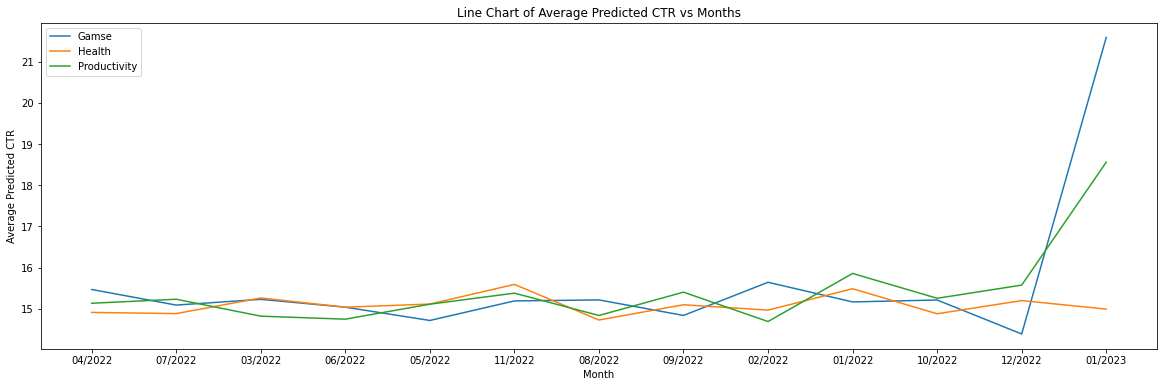

In [18]:
# Line Chart 2 - Line Chart of Average Predicted CTR vs Months for different Sub Types
plt.figure(figsize=(20, 6))
sns.lineplot(x='month', y='predicted_ctr', hue='sub_type', estimator='mean', errorbar=None, data=df)
plt.title('Line Chart of Average Predicted CTR vs Months')
plt.xlabel('Month')
plt.ylabel('Average Predicted CTR')
plt.legend(loc='upper left')
plt.show()

As depicted in the graph above, the rise can be attributed to heightened competition among companies vying for consumer attention towards the year's end. From a strategic perspective, this surge aids companies in clearing out existing inventory to accommodate new product launches in the upcoming year.

In [19]:
# Filtered dataframe using tag, sub type and cost to create a heatmap 1
tag_subtype_cost_data = [[round(mean(df[(df.tag == 'InApp') & (df.sub_type == 'Gamse')].cost)),
                       round(mean(df[(df.tag == 'InApp') & (df.sub_type == 'Health')].cost)),
                       round(mean(df[(df.tag == 'InApp') & (df.sub_type == 'Productivity')].cost))],
                 [round(mean(df[(df.tag == 'Banner') & (df.sub_type == 'Gamse')].cost)),
                       round(mean(df[(df.tag == 'Banner') & (df.sub_type == 'Health')].cost)),
                       round(mean(df[(df.tag == 'Banner') & (df.sub_type == 'Productivity')].cost))],
                 [round(mean(df[(df.tag == 'Interstitial') & (df.sub_type == 'Gamse')].cost)),
                       round(mean(df[(df.tag == 'Interstitial') & (df.sub_type == 'Health')].cost)),
                       round(mean(df[(df.tag == 'Interstitial') & (df.sub_type == 'Productivity')].cost))]]
tag_subtype_cost_df = pd.DataFrame(tag_subtype_cost_data, columns=['Gamse', 'Health', 'Productivity'], index=['Inapp','Banner','Interstitial'])
tag_subtype_cost_df.head()

Gamse  Health  Productivity
Inapp           201     200           198
Banner          202     198           199
Interstitial    200     199           197

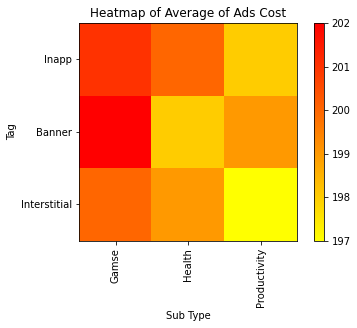

In [20]:
# Heatmap 1 - Average Ads Cost for Different Tag and Sub Type Combination
plt.imshow(tag_subtype_cost_df, cmap='autumn_r')
cbar = plt.colorbar()
plt.title("Heatmap of Average of Ads Cost")
plt.xlabel("Sub Type")
plt.ylabel("Tag")
plt.xticks(range(len(tag_subtype_cost_df.columns)),\
           tag_subtype_cost_df.columns, rotation=90)
plt.yticks(range(len(tag_subtype_cost_df.index)),
           tag_subtype_cost_df.index)
plt.show()

In [21]:
# Filtered dataframe using tag, sub type, and cost to create a heatmap 2
tag_subtype_ctr_data = [[mean(df[(df.tag == 'InApp') & (df.sub_type == 'Gamse')].predicted_ctr),
                       mean(df[(df.tag == 'InApp') & (df.sub_type == 'Health')].predicted_ctr),
                       mean(df[(df.tag == 'InApp') & (df.sub_type == 'Productivity')].predicted_ctr)],
                 [mean(df[(df.tag == 'Banner') & (df.sub_type == 'Gamse')].predicted_ctr),
                       mean(df[(df.tag == 'Banner') & (df.sub_type == 'Health')].predicted_ctr),
                       mean(df[(df.tag == 'Banner') & (df.sub_type == 'Productivity')].predicted_ctr)],
                 [mean(df[(df.tag == 'Interstitial') & (df.sub_type == 'Gamse')].predicted_ctr),
                       mean(df[(df.tag == 'Interstitial') & (df.sub_type == 'Health')].predicted_ctr),
                       mean(df[(df.tag == 'Interstitial') & (df.sub_type == 'Productivity')].predicted_ctr)]]
tag_subtype_ctr_df = pd.DataFrame(tag_subtype_ctr_data, columns=['Gamse', 'Health', 'Productivity'], index=['Inapp','Banner','Interstitial'])
tag_subtype_ctr_df.head()

Gamse     Health  Productivity
Inapp         15.220907  15.067161     14.956354
Banner        15.000636  14.977917     15.202954
Interstitial  15.056242  15.053114     15.176441

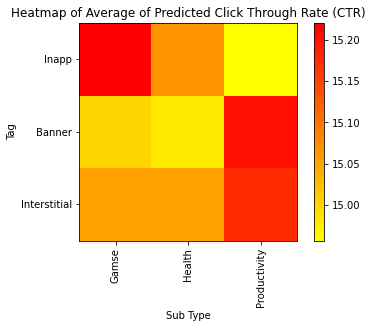

In [22]:
# Heatmap 2 - Average of Predicted Click Through Rate (CTR) for Different Tag and Sub Type Combination
plt.imshow(tag_subtype_ctr_df, cmap='autumn_r')
cbar = plt.colorbar()
plt.title("Heatmap of Average of Predicted Click Through Rate (CTR)")
plt.xlabel("Sub Type")
plt.ylabel("Tag")
plt.xticks(range(len(tag_subtype_ctr_df.columns)),\
           tag_subtype_ctr_df.columns, rotation=90)
plt.yticks(range(len(tag_subtype_ctr_df.index)),
           tag_subtype_ctr_df.index)
plt.show()

According to the two
graph above, Interstitial-Productivity ads demonstrate the lowest advertising cost along with the highest predicted Click-Through Rate (CTR).

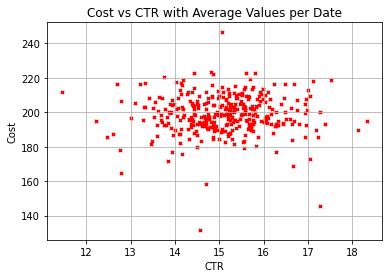

In [23]:
#Scatter plot:The average cost and average (CTR) for each date.avg_data 
avg_data = df.groupby('date').agg({'predicted_ctr': 'mean', 'cost': 'mean'})
plt.scatter(avg_data.predicted_ctr, avg_data.cost, color='red', marker="x", s=10, label='Average per Date')
plt.xlabel('CTR')
plt.ylabel('Cost')
plt.title('Cost vs CTR with Average Values per Date')
plt.grid(True)

plt.show()

From the observed graph, it's evident that there is no linear correlation between the cost and the predicted Click-Through Rate (CTR). This implies that an increase in cost does not necessarily translate to a higher CTR.

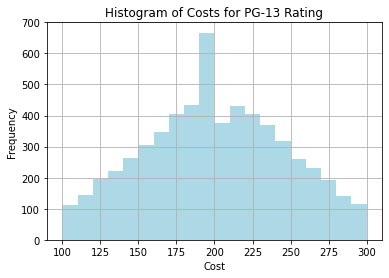

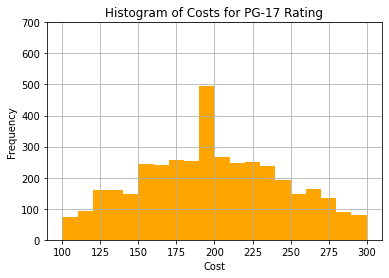

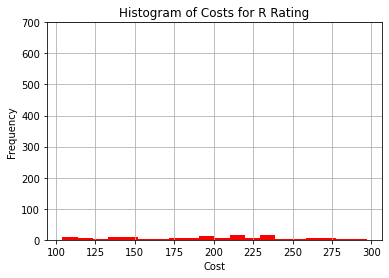

In [24]:
#HISTOGRAM: Costs associated with the PG label
pg_13_data = df[df['rating'] == 'PG-13']
pg_17_data = df[df['rating'] == 'PG-17']
r_data = df[df['rating'] == 'R']

plt.hist(pg_13_data['cost'], bins=20, color='lightblue')

plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Histogram of Costs for PG-13 Rating')
plt.ylim(0, 700)
plt.grid(True)

plt.show()

plt.hist(pg_17_data['cost'], bins=20, color='orange')

plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Histogram of Costs for PG-17 Rating')
plt.ylim(0, 700)
plt.grid(True)

plt.show()

plt.hist(r_data['cost'], bins=20, color='red')

plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Histogram of Costs for R Rating')
plt.ylim(0, 700)
plt.grid(True)

plt.show()

 R-rated ads.R-rated ads are notably fewer than PG-13 and PG-17 ads, and while the costs of PG-13 and PG-17 ads exhibit a normal distribution. No such pattern is observed for R-rated ads

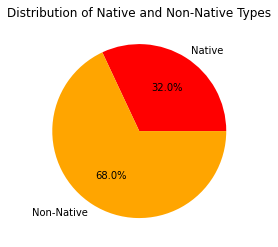

In [25]:
#PIE CHART: Count of native and non-native types from the data
native_count = df[df['type'] == 'Native'].shape[0]
non_native_count = df[df['type'] == 'non-Native'].shape[0]

labels = ['Native', 'Non-Native']
sizes = [native_count, non_native_count]
colors = ['red', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('Distribution of Native and Non-Native Types')

plt.show()

The above graph illustrates a higher prevalence of non-native ads compared to native ads.

# Conclusion
-  Non-native ads hold a major share of 68%, even though native ads are known to be more effective. It could be because non-native ads provide benefits like visibility, consistency, and measurable performance.
-   The number of ads is highest on Thursdays. It could be because of the ease with which the ads can grab the consumer’s attention as they gear up for the weekends.
-   The number of R-rated ads is less, but have a higher predicted CTR.
-   The predicted CTR for game ads spikes around the year’s end and has almost the same cost throughout the year. The companies selling games could take advantage of this situation by showing more ads in December.